#**IT-641 Deep Learning**

 #**Lab 1**

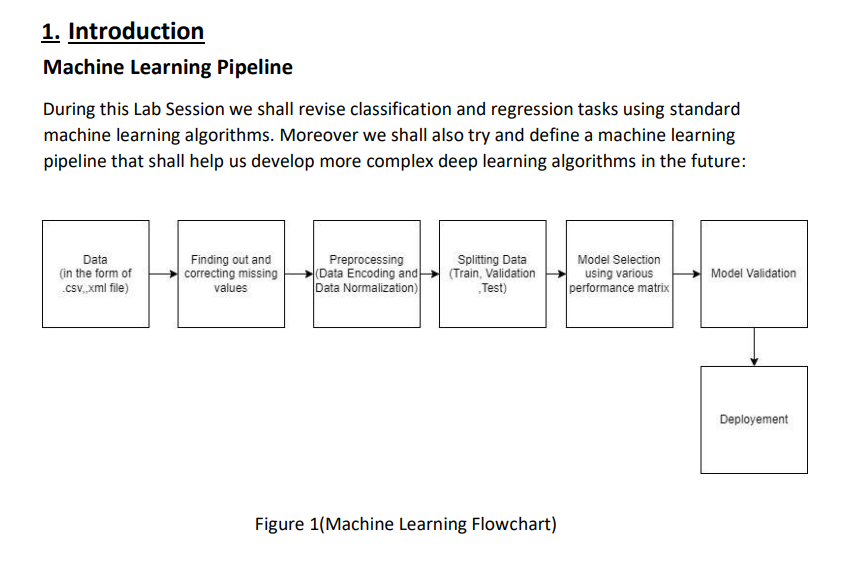

#2. Datasets

1. User dataset
This dataset contains information of users from the company's database. It contains
information about UserID, Gender, Age, EstimatedSalary,Purchased.
2. Pima Indians Diabetes Database
This dataset is originally from the National Institute of Diabetes and Digestive and
Kidney Diseases. The objective of the dataset is to diagnostically predict whether
or not a patient has diabetes, based on certain diagnostic measurements included
in the dataset. The datasets consist of several medical predictor variables and one
target variable, Outcome. Predictor variables include the number of pregnancies
the patient has had, their BMI, insulin level, age, and so on.
3. 50_Startups
This dataset has data collected from New York, California and Florida about 50
business Startups. The variables used in the dataset are Profit, R&D spending,
Administration Spending, and Marketing Spending.

#3. Tasks
For each of the above given datasets
1. Load Data and check if the data has missing value
2. Identify which features need to be encoded and encode them
3. Identify which features to normalize and normalize them
4. Identify whether the given task is of classification of regression
5. Split the data into train set (75%) validation set (10%) and test set (15%)
6. Fit the data into 2 models of your choice


REFERENCE CODE - https://colab.research.google.com/drive/1lEqUTriS66KBbn1V648NooaqIsTB3MvE?usp=sharing

#DATASET 1

#User dataset

This dataset contains information of users from the company's database. It contains information about UserID, Gender, Age, EstimatedSalary,Purchased.

#1.Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings(action = "ignore")

# 2.Loading Data


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_01/User_Data%20-%20User_Data.csv?token=GHSAT0AAAAAAB5J5GGWYPROKKWBVFZVJZ4EZGQUPHQ")

In [3]:
# Previewing data
data.head(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1


Looking at the above dataset our target variable is the column "Purchased"

#3.Looking for Null values

In [4]:
print(data.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


There is no null values in our dataset so we will go forward

#4.Preprocessing

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 1.Removing Unnecessary columns

Feature 'User ID' are meaningless when we fit them to our model. Thus we drop these feature.

In [6]:
data.drop(["User ID"],1,inplace = True)

## 2.Converting Categorical Variables into their corresponding form

In [7]:
print(data.dtypes)

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [8]:
#encoding the Gender column
lb = LabelBinarizer()
data['Gender'] = lb.fit_transform(data['Gender'])

#3.Scaling Features

In the same way as encoding features we can also scale features manually. Scikit learn as inbuilt scalers that do the same task. Here we shall use standard scaler for our task

In [9]:
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [10]:
# sc = StandardScaler()
sc = MinMaxScaler()

# Fit and transform the data using the scaler
# X_scaled = scaler.fit_transform(X)
data["EstimatedSalary"] = sc.fit_transform(data["EstimatedSalary"].values.reshape(-1,1))

In [11]:
# sc = StandardScaler()
sc = MinMaxScaler()
data["Age"] = sc.fit_transform(data["Age"].values.reshape(-1,1))

#5.Basic EDA

#1.Gathering some info about data

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.490000,0.500526,0.0,0.000000,0.000000,1.000000,1.0
Age,400.0,0.467976,0.249592,0.0,0.279762,0.452381,0.666667,1.0
EstimatedSalary,400.0,0.405500,0.252570,0.0,0.207407,0.407407,0.540741,1.0
Purchased,400.0,0.357500,0.479864,0.0,0.000000,0.000000,1.000000,1.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int64  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


#2.Correlation plot

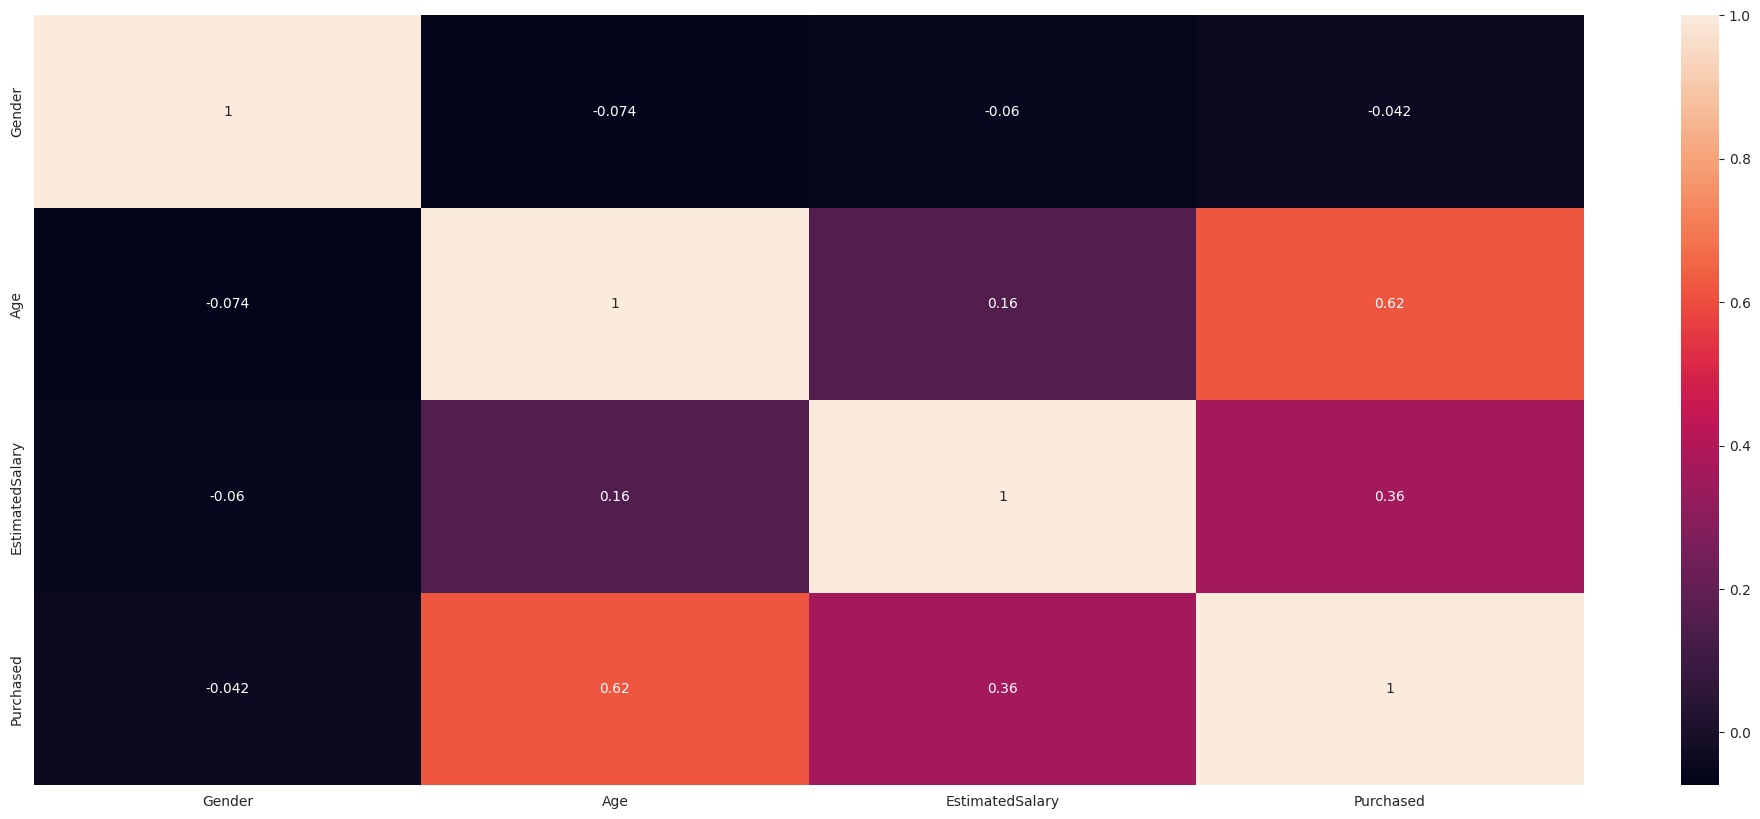

In [14]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True);

OBSERVATION:

We clearly see that attribute **Age** and **Purchased** attribute have a correlation of 0.62 suggests a moderately strong positive correlation. It implies that as age increases, the purchases tend to increase as well, but not necessarily in a perfectly linear fashion

## 3.Pairplot

<Figure size 2500x2500 with 0 Axes>

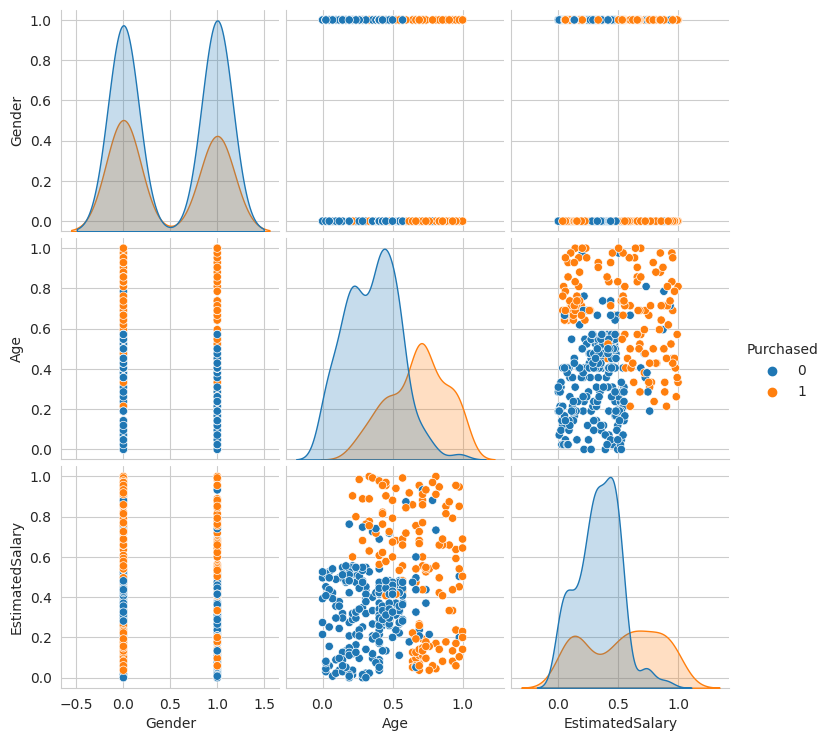

In [15]:
plt.figure(figsize = (25,25))
sb.pairplot(data,hue = "Purchased");

#4.You can plot using pandas too.

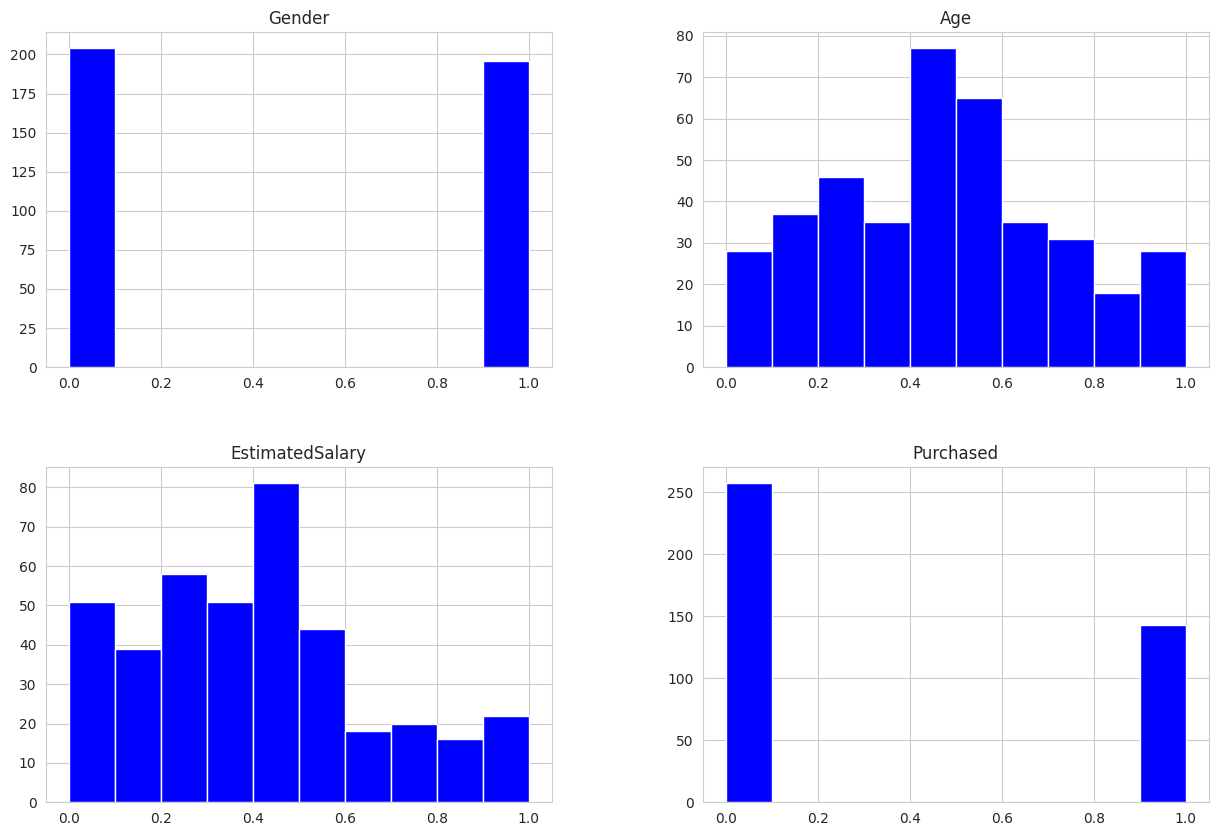

In [16]:
data.hist(figsize = (15,10),color = 'blue');

#6.Splitting the dataset

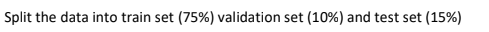

In [17]:
data

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0
...,...,...,...,...
395,0,0.666667,0.192593,1
396,1,0.785714,0.059259,1
397,0,0.761905,0.037037,1
398,1,0.428571,0.133333,0


In [18]:
x = data.iloc[:,:3]
y = data['Purchased']

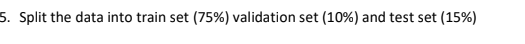

In [19]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.4,random_state = 42)

In [20]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(300, 3) (60, 3) (40, 3)
(300,) (60,) (40,)


#7.Model Selection

Before we fit our data into our model we need to define some metrics with the help of which we can select the best fitting model

As our current task is classification we shall create a function that evaluates our model based on precision score,recall score and F1-score

In [21]:
def evaluate(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid):
  print(f"Model performance for{model_name}")
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  y_valid_pred = model.predict(x_valid)

  #confusion matrix
  plt.figure(figsize = (10,10))
  sb.heatmap(confusion_matrix(y_train,y_train_pred),annot = True)
  plt.title('Confusion Matrix')
  plt.show()

  #precision score
  precision_score_train = precision_score(y_train,y_train_pred)
  precision_score_test = precision_score(y_test,y_test_pred)
  precision_score_valid = precision_score(y_valid,y_valid_pred)

  #recallscore
  recall_score_train = recall_score(y_train,y_train_pred)
  recall_score_test = recall_score(y_test,y_test_pred)
  recall_score_valid = recall_score(y_valid,y_valid_pred)

  #f1 score
  f1_score_train = f1_score(y_train,y_train_pred)
  f1_score_test = f1_score(y_test,y_test_pred)
  f1_score_valid = f1_score(y_valid,y_valid_pred)

  print("Precision Score Train:",precision_score_train)
  print("Precision Score Test:",precision_score_test)
  print("Precision Score Validation",precision_score_valid)

  print("recall Score Train:",recall_score_train)
  print("recal Score Test:",recall_score_test)
  print("recall Score Validation",recall_score_valid)

  print("f1 Score Train:",f1_score_train)
  print("f1 Score Test:",f1_score_test)
  print("f1 Score Validation",f1_score_valid)



  return precision_score_train,precision_score_test,precision_score_valid,recall_score_train,recall_score_test,recall_score_valid,f1_score_train,f1_score_test,f1_score_valid


In [22]:
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)

LogisticRegression()

Model performance forLogisticRegression()


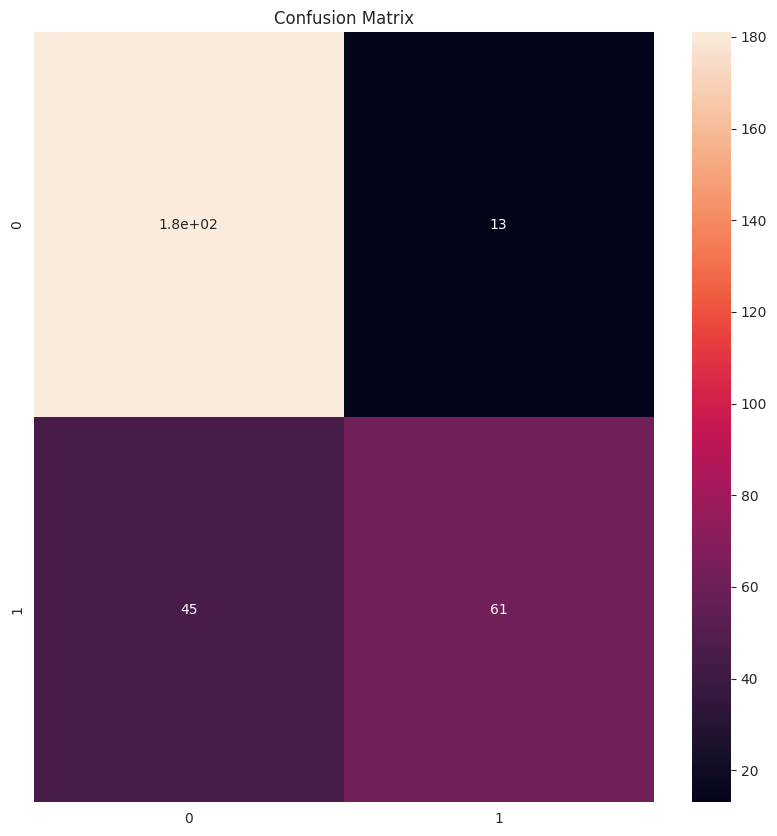

Precision Score Train: 0.8243243243243243
Precision Score Test: 0.9375
Precision Score Validation 1.0
recall Score Train: 0.5754716981132075
recal Score Test: 0.6818181818181818
recall Score Validation 0.6666666666666666
f1 Score Train: 0.6777777777777778
f1 Score Test: 0.7894736842105263
f1 Score Validation 0.8


In [23]:
LR = evaluate(clf1,clf1)

#2.KNN

In [24]:
clf2 = KNeighborsClassifier(n_neighbors = 3)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Model performance forKNeighborsClassifier(n_neighbors=3)


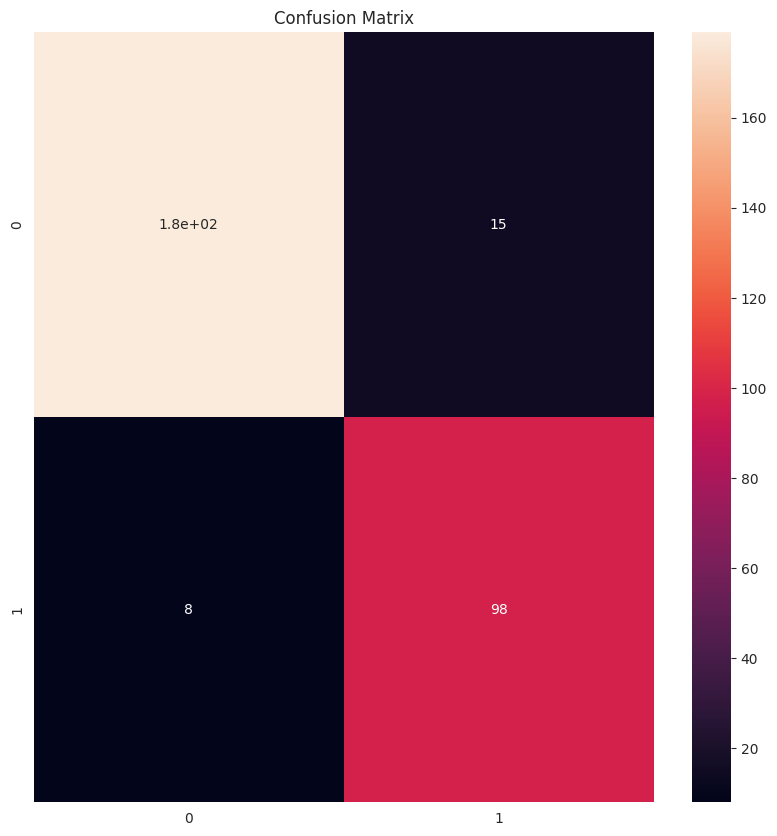

Precision Score Train: 0.8672566371681416
Precision Score Test: 0.95
Precision Score Validation 0.7777777777777778
recall Score Train: 0.9245283018867925
recal Score Test: 0.8636363636363636
recall Score Validation 0.9333333333333333
f1 Score Train: 0.8949771689497716
f1 Score Test: 0.9047619047619048
f1 Score Validation 0.8484848484848485


In [25]:
KNN = evaluate(clf2,clf2)

#3.SVM

In [26]:
clf3 = SVC(kernel = "linear")
clf3.fit(x_train,y_train)

SVC(kernel='linear')

Model performance forSVC(kernel='linear')


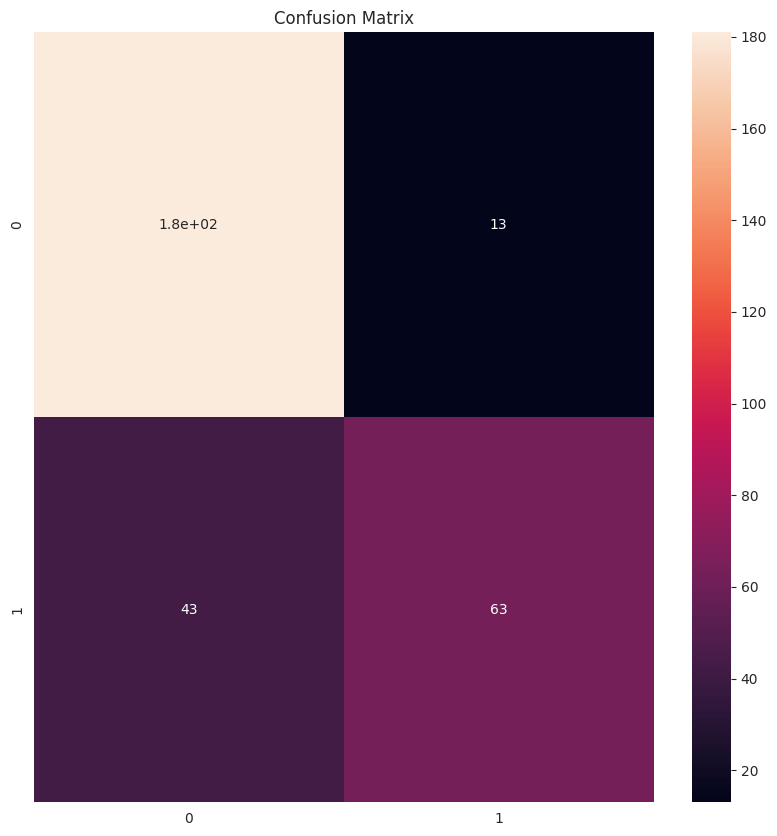

Precision Score Train: 0.8289473684210527
Precision Score Test: 0.9375
Precision Score Validation 1.0
recall Score Train: 0.5943396226415094
recal Score Test: 0.6818181818181818
recall Score Validation 0.6666666666666666
f1 Score Train: 0.6923076923076923
f1 Score Test: 0.7894736842105263
f1 Score Validation 0.8


In [27]:
svc = evaluate(clf3,clf3)

#4 Random Forest

In [28]:
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)
clf4.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Model performance forRandomForestClassifier(random_state=42)


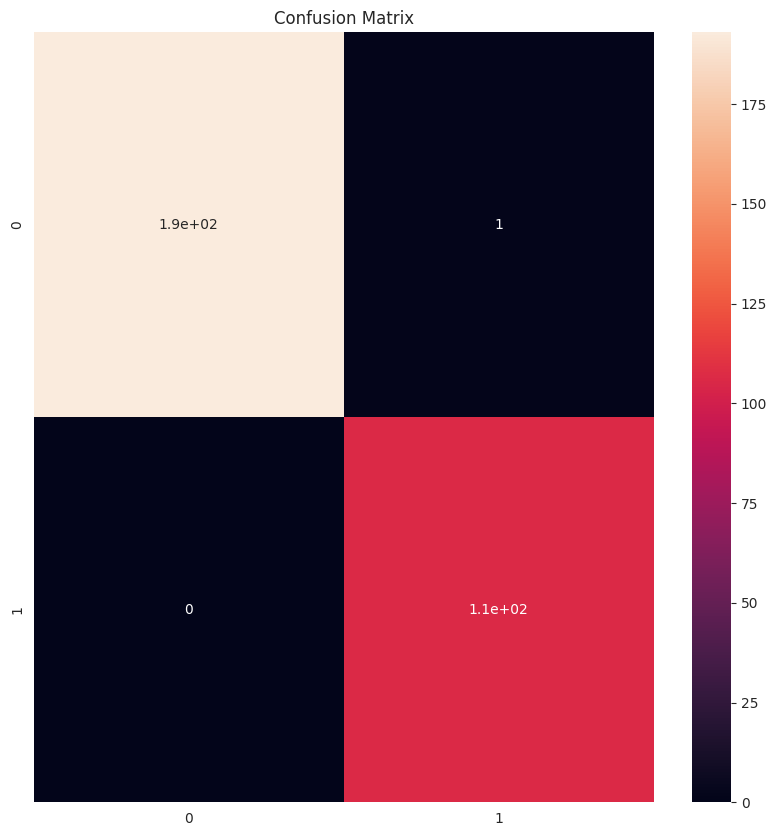

Precision Score Train: 0.9906542056074766
Precision Score Test: 0.9444444444444444
Precision Score Validation 0.75
recall Score Train: 1.0
recal Score Test: 0.7727272727272727
recall Score Validation 1.0
f1 Score Train: 0.9953051643192489
f1 Score Test: 0.85
f1 Score Validation 0.8571428571428571


In [29]:
rf = evaluate(clf4,clf4)

In [30]:
model_performance = [["Logistic Regression",LR[0],LR[1],LR[3],LR[4],LR[5],LR[6],LR[7],LR[8]],
                     ["Knearest Neighbors",KNN[0],KNN[1],KNN[3],KNN[4],KNN[5],KNN[6],KNN[7],KNN[8]],
                     ["Support Vector Machine",svc[0],svc[1],svc[3],svc[4],svc[5],svc[6],svc[7],svc[8]],
                     ["Random Forest",rf[0],rf[1],rf[3],rf[4],rf[5],rf[6],rf[7],rf[8]]
                     ]

In [31]:
model_performance = pd.DataFrame(model_performance,columns = ["Precision Score Train","Precision Score Test","Precision Score Validation","Recall Score Train","Recall Score Test","Recall Score Validation","F1 Score Train","F1 Score Test","F1 Score Validation"])

In [32]:
model_performance

,Precision Score Train,Precision Score Test,Precision Score Validation,Recall Score Train,Recall Score Test,Recall Score Validation,F1 Score Train,F1 Score Test,F1 Score Validation
0,Logistic Regression,0.824324,0.937500,0.575472,0.681818,0.666667,0.677778,0.789474,0.800000
1,Knearest Neighbors,0.867257,0.950000,0.924528,0.863636,0.933333,0.894977,0.904762,0.848485
2,Support Vector Machine,0.828947,0.937500,0.594340,0.681818,0.666667,0.692308,0.789474,0.800000
3,Random Forest,0.990654,0.944444,1.000000,0.772727,1.000000,0.995305,0.850000,0.857143


#DATASET - 2

#Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and
Kidney Diseases. The objective of the dataset is to diagnostically predict whether
or not a patient has diabetes, based on certain diagnostic measurements included
in the dataset. The datasets consist of several medical predictor variables and one
target variable, Outcome. Predictor variables include the number of pregnancies
the patient has had, their BMI, insulin level, age, and so on.

#1.Loading Required Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings(action = "ignore")

#2.Loading Data

In [34]:
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_01/diabetes%20-%20diabetes.csv")

In [35]:
# Previewing data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Looking at the above dataset our target variable is the column "Outcome"

# 3.Looking for Null values

In [36]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There is no missing or null values in the dataset

# 4.Preprocessing

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



## 1.Removing Unnecessary columns

In [38]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<p> Based on general domain knowledge, some features may be considered more directly related to diabetes risk than others. In many cases, "Pregnancies" might not be directly related to diabetes risk but could have an indirect impact through other factors. It's important to conduct a thorough analysis, such as feature importance from a machine learning model, to determine the relative importance of each feature in predicting diabetes for a given dataset.</p>

#2.Converting Categorical Variables into their corresponding form

In [39]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


There is no categorical varirables in the dataset.

#3.Scaling Features

StandardScaler: This scaler assumes that the data follows a Gaussian (normal) distribution

MinMaxScaler:This scaler is more appropriate when your data doesn't follow a normal distribution or when you have features with significantly different scales.

In [40]:
sc = StandardScaler()
data["Pregnancies"] = sc.fit_transform(data["Pregnancies"].values.reshape(-1,1))

Mean 121.0


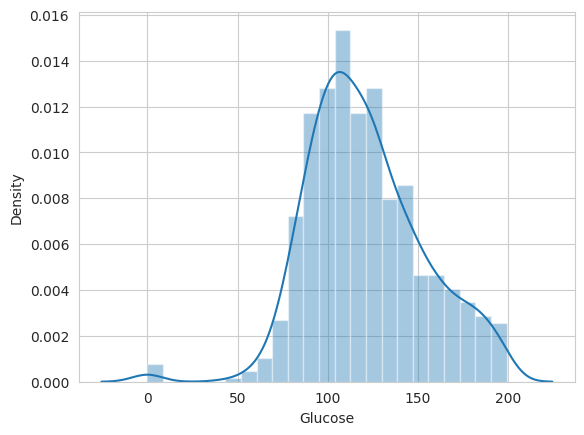

In [41]:
sb.distplot(data["Glucose"]);
print("Mean",np.round(np.mean(data["Glucose"]),0))

In [42]:
sc = StandardScaler()
data["Glucose"] = sc.fit_transform(data["Glucose"].values.reshape(-1,1))

In [43]:
sc = StandardScaler()
data["BloodPressure"] = sc.fit_transform(data["BloodPressure"].values.reshape(-1,1))

In [44]:
sc = StandardScaler()
data["Insulin"] = sc.fit_transform(data["Insulin"].values.reshape(-1,1))

In [45]:
sc = StandardScaler()
data["BMI"] = sc.fit_transform(data["BMI"].values.reshape(-1,1))

In [46]:
sc = StandardScaler()
data["DiabetesPedigreeFunction"] = sc.fit_transform(data["DiabetesPedigreeFunction"].values.reshape(-1,1))

In [47]:
sc = StandardScaler()
data["Age"] = sc.fit_transform(data["Age"].values.reshape(-1,1))

In [48]:
sc = StandardScaler()
data["SkinThickness"] = sc.fit_transform(data["SkinThickness"].values.reshape(-1,1))

#5.Basic EDA

#1.Gathering some info about data

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-9.251859e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,1.503427e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,1.006140e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.006854e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.590520e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


## 2.Correlation plot

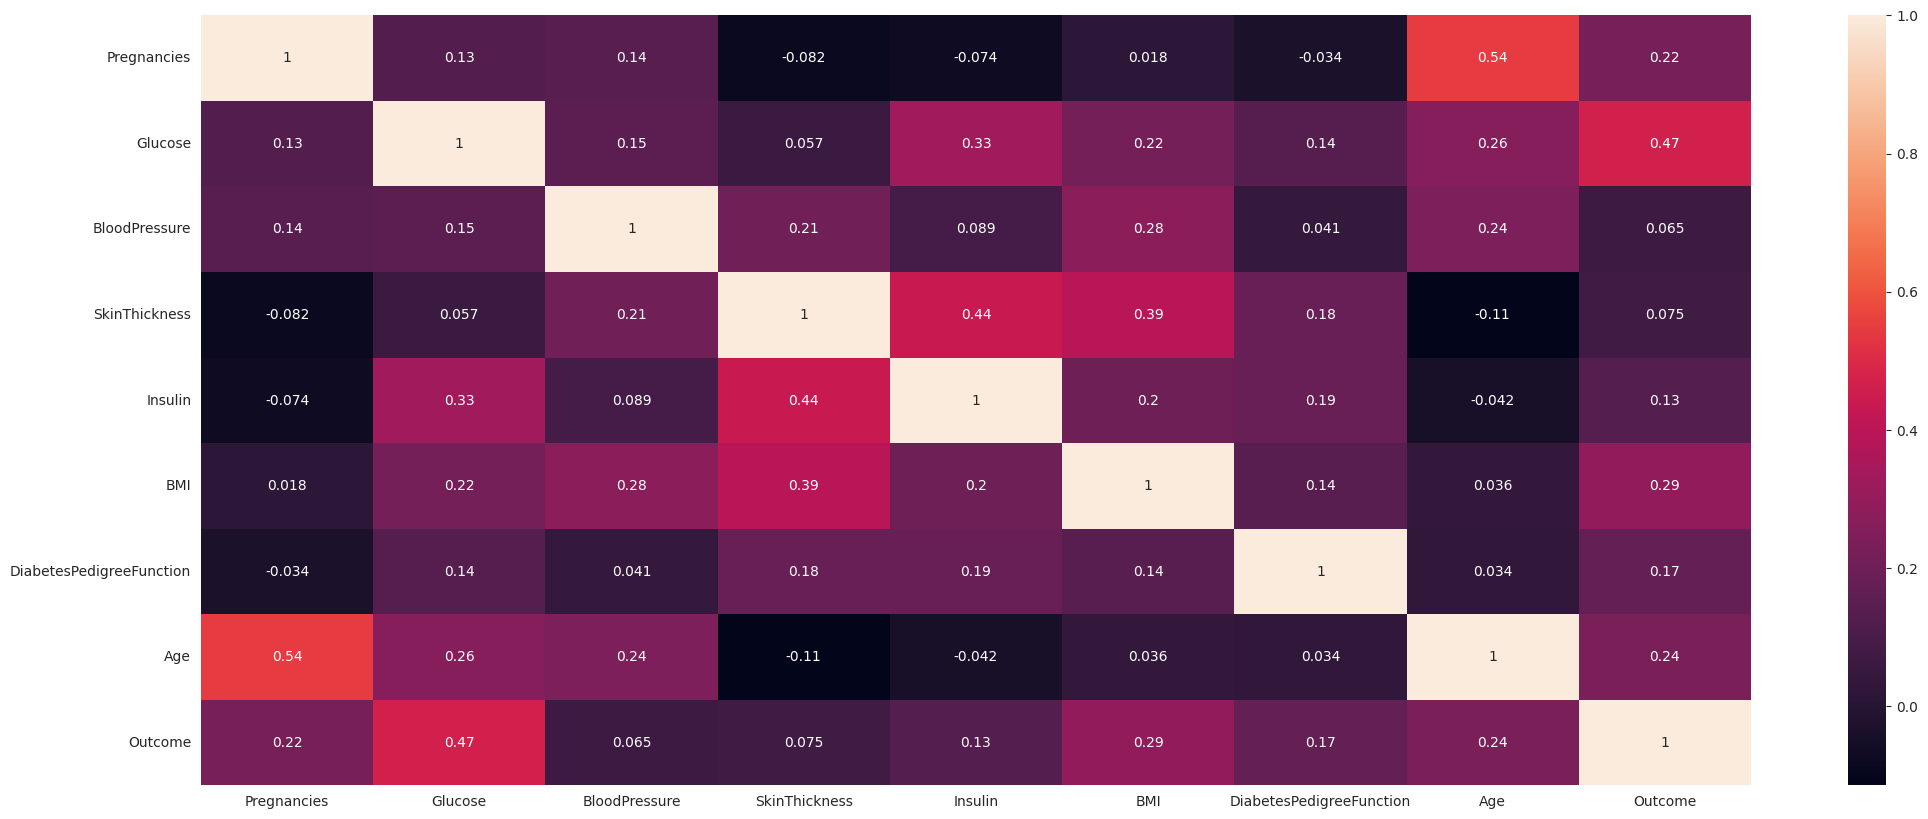

In [51]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True);

In general, a common approach is to set a correlation threshold (often a positive value) and keep features with correlations above that threshold. Common threshold values can range from 0.1 to 0.3

In this case I have decided the threshold value of 0.1

From above correlation chart we are rejecting BloodPressure and Skinthickness feature.

In [52]:
data.drop(["BloodPressure","SkinThickness"],1,inplace = True)

#3.Pairplot

<Figure size 2500x2500 with 0 Axes>

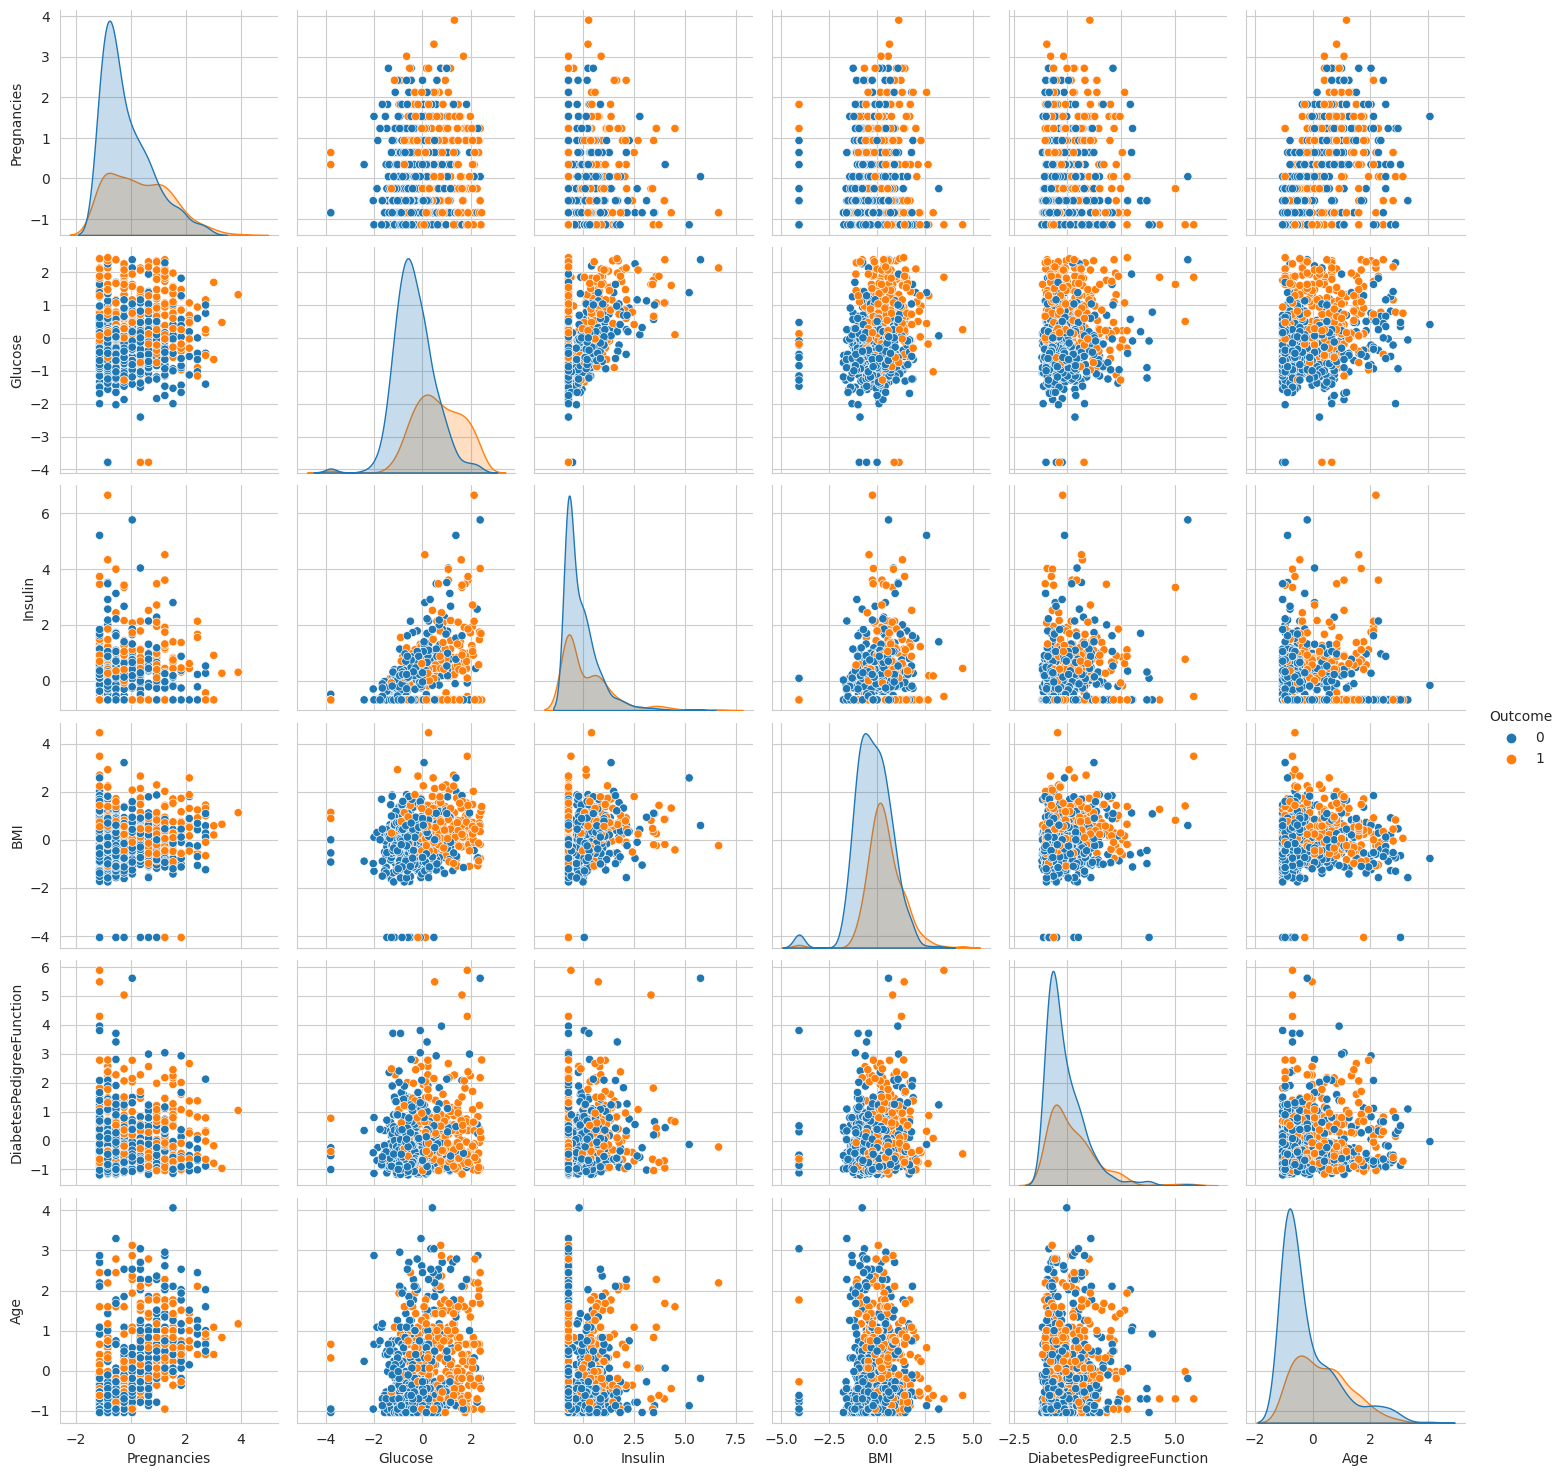

In [53]:
plt.figure(figsize = (25,25))
sb.pairplot(data,hue = "Outcome");

## 4.You can plot using pandas too..


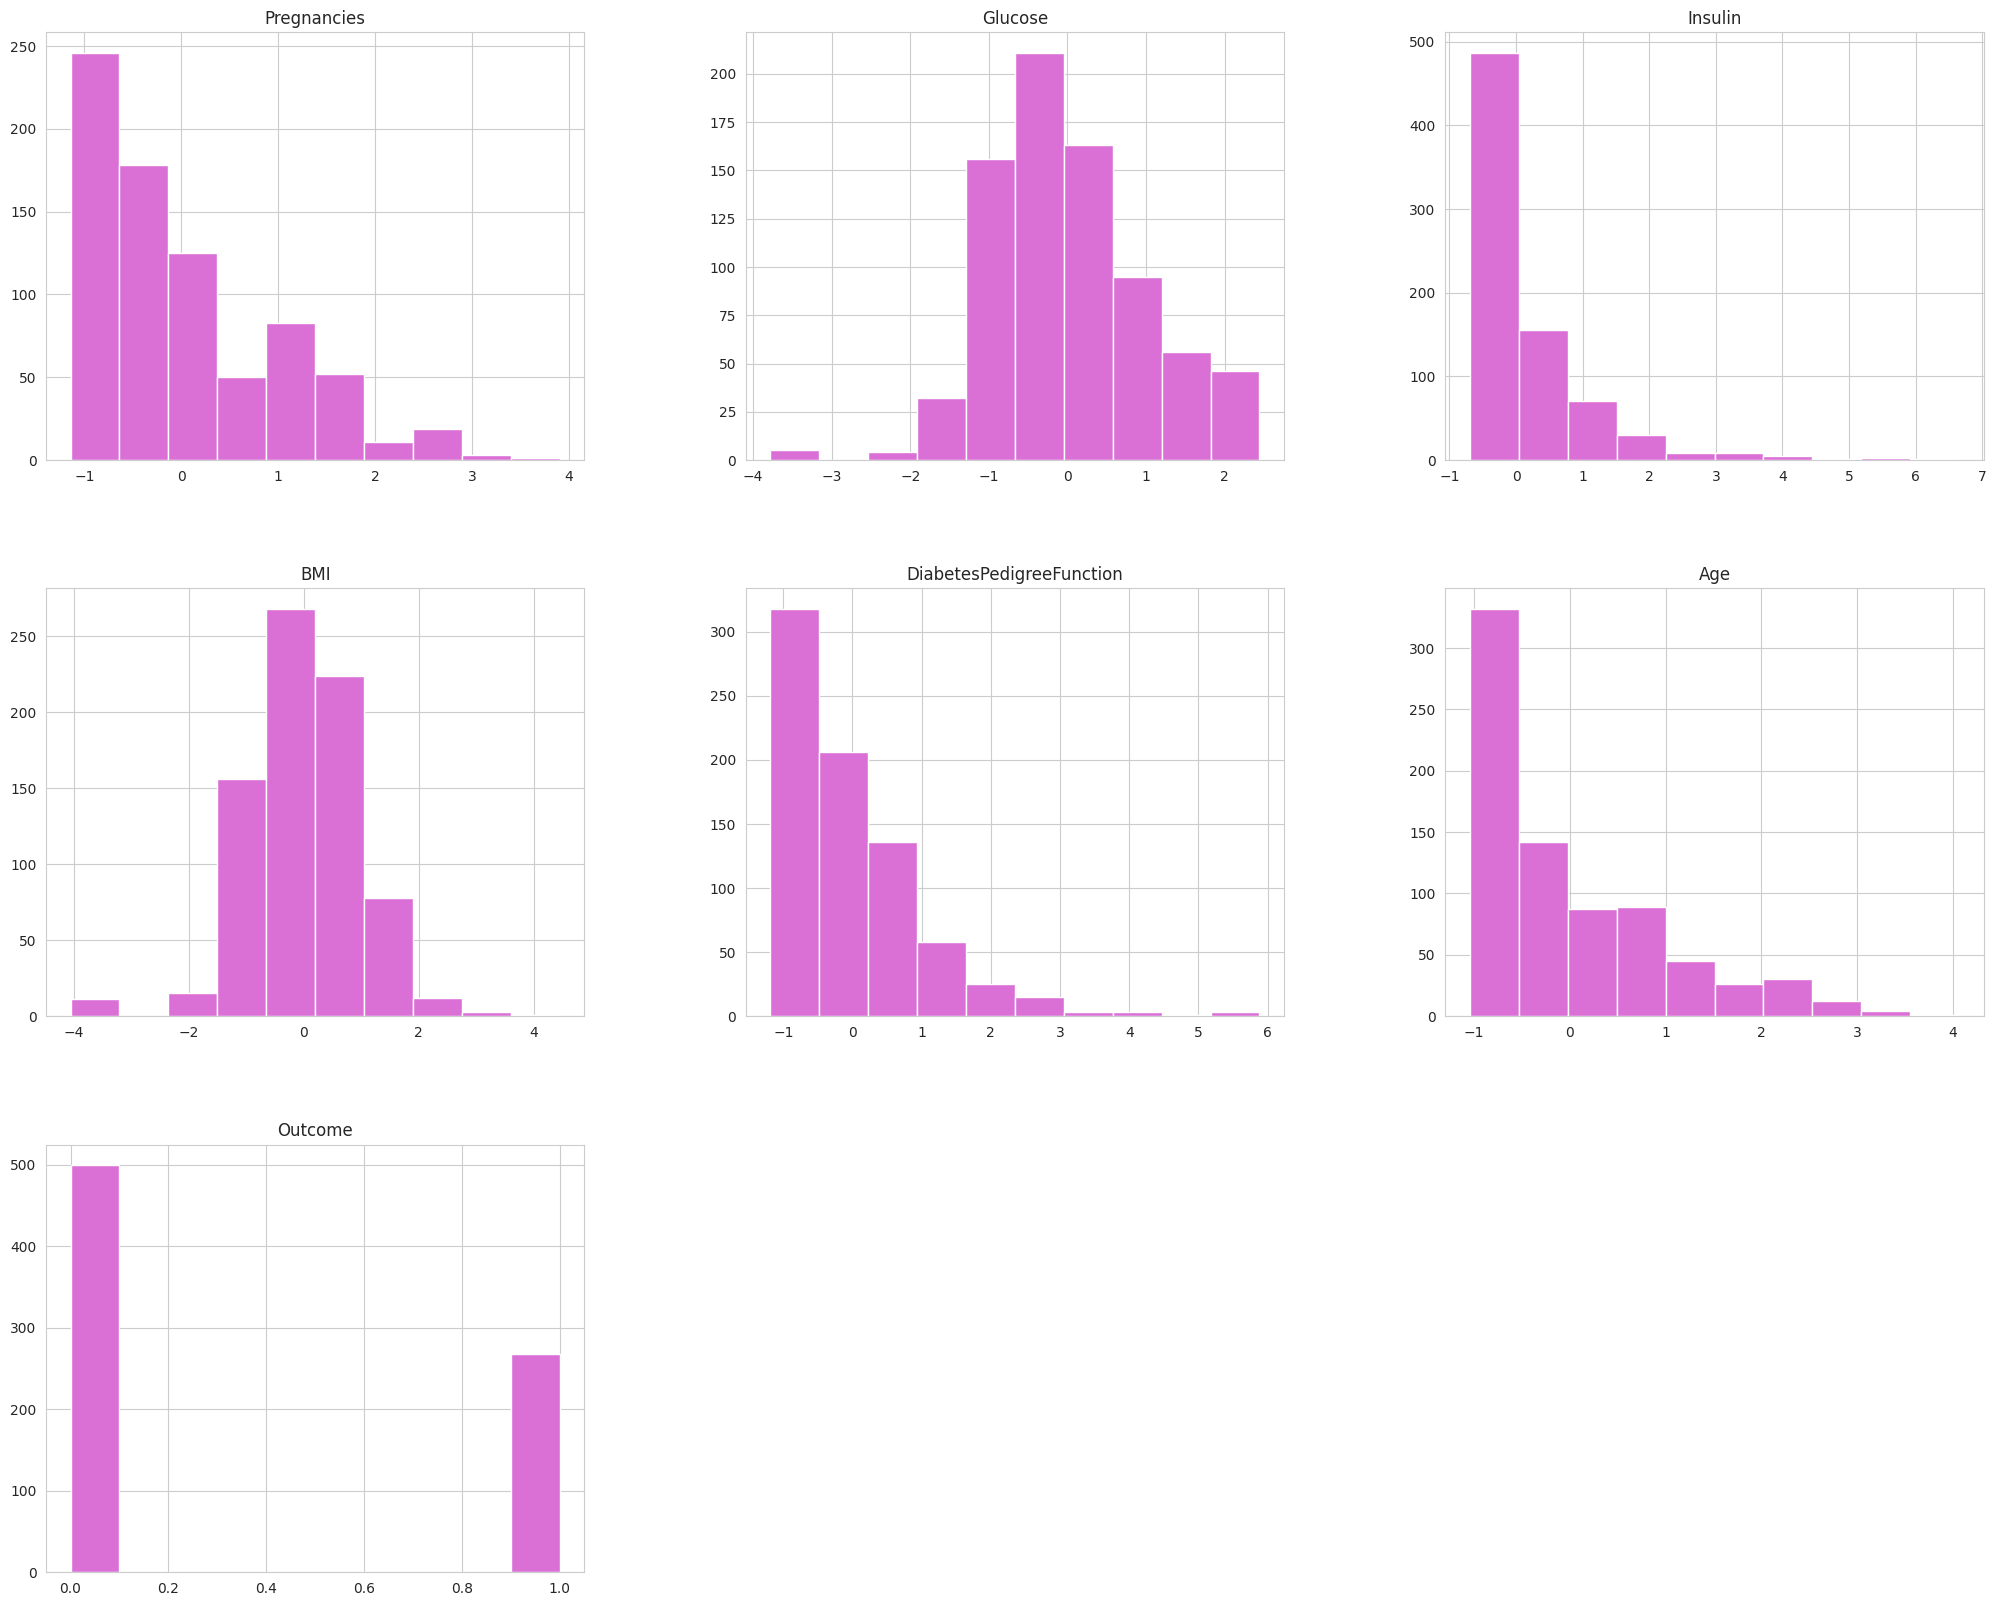

In [54]:
data.hist(figsize = (25,20),color = 'orchid');


#6.Splitting the dataset

In [55]:
data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.692891,-0.240205,-0.371101,1.170732,1


In [56]:
x = data.iloc[:,:6]
y = data['Outcome']

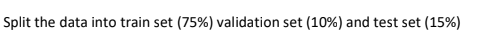

In [57]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.4,random_state = 42)

In [58]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(576, 6) (115, 6) (77, 6)
(576,) (115,) (77,)


#7.Model Selection

Before we fit our data into our model we need to define some metrics with the help of which we can select the best fitting model

As our current task is classification we shall create a function that evaluates our model based on precision score,recall score and F1-score

In [59]:
def evaluate(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid):
  print(f"Model performance for{model_name}")
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  y_valid_pred = model.predict(x_valid)

  #confusion matrix
  plt.figure(figsize = (10,10))
  sb.heatmap(confusion_matrix(y_train,y_train_pred),annot = True)
  plt.title('Confusion Matrix')
  plt.show()

  #precision score
  precision_score_train = precision_score(y_train,y_train_pred)
  precision_score_test = precision_score(y_test,y_test_pred)
  precision_score_valid = precision_score(y_valid,y_valid_pred)

  #recallscore
  recall_score_train = recall_score(y_train,y_train_pred)
  recall_score_test = recall_score(y_test,y_test_pred)
  recall_score_valid = recall_score(y_valid,y_valid_pred)

  #f1 score
  f1_score_train = f1_score(y_train,y_train_pred)
  f1_score_test = f1_score(y_test,y_test_pred)
  f1_score_valid = f1_score(y_valid,y_valid_pred)

  print("Precision Score Train:",precision_score_train)
  print("Precision Score Test:",precision_score_test)
  print("Precision Score Validation",precision_score_valid)

  print("recall Score Train:",recall_score_train)
  print("recal Score Test:",recall_score_test)
  print("recall Score Validation",recall_score_valid)

  print("f1 Score Train:",f1_score_train)
  print("f1 Score Test:",f1_score_test)
  print("f1 Score Validation",f1_score_valid)



  return precision_score_train,precision_score_test,precision_score_valid,recall_score_train,recall_score_test,recall_score_valid,f1_score_train,f1_score_test,f1_score_valid


#1.Logistic Regression

In [60]:
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)

LogisticRegression()

Model performance forLogisticRegression()


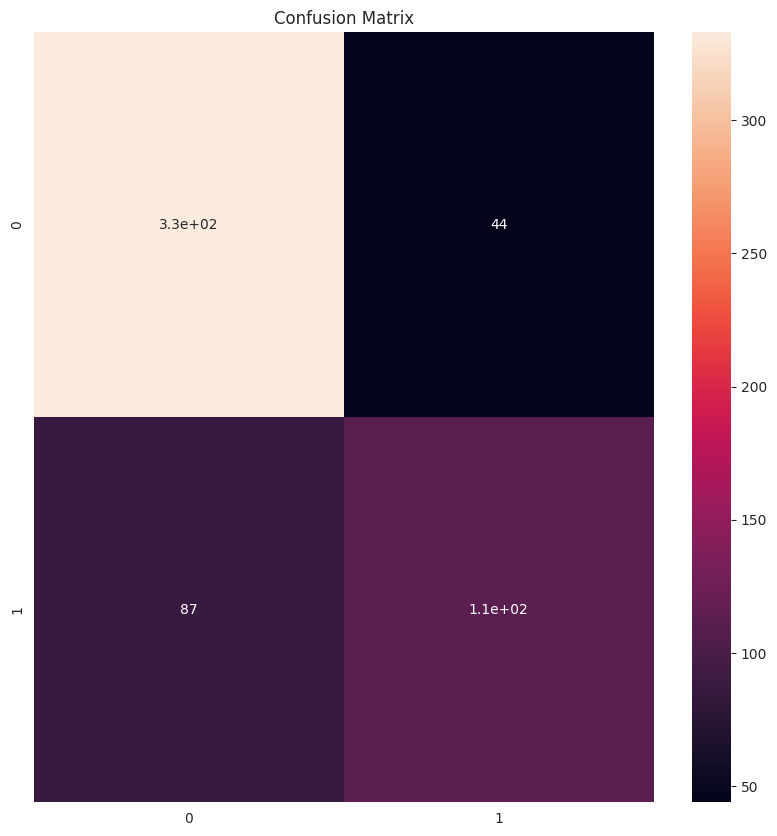

Precision Score Train: 0.717948717948718
Precision Score Test: 0.6285714285714286
Precision Score Validation 0.6363636363636364
recall Score Train: 0.5628140703517588
recal Score Test: 0.55
recall Score Validation 0.7241379310344828
f1 Score Train: 0.6309859154929578
f1 Score Test: 0.5866666666666667
f1 Score Validation 0.6774193548387097


In [61]:
LR = evaluate(clf1,clf1)

#2.KNN

In [62]:
clf2 = KNeighborsClassifier(n_neighbors = 3)
clf2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Model performance forKNeighborsClassifier(n_neighbors=3)


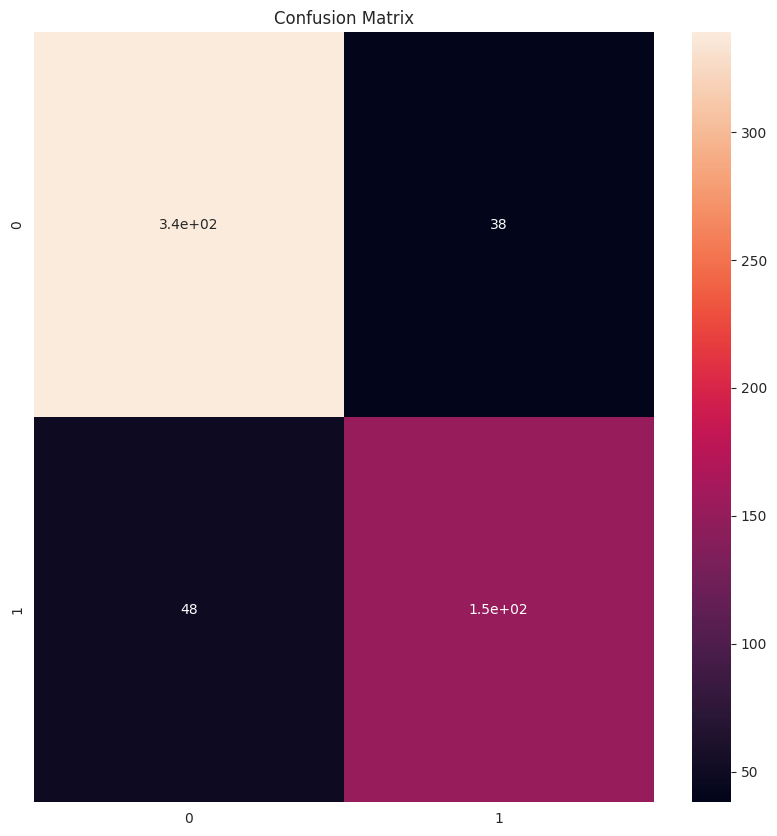

Precision Score Train: 0.798941798941799
Precision Score Test: 0.5
Precision Score Validation 0.6551724137931034
recall Score Train: 0.7587939698492462
recal Score Test: 0.475
recall Score Validation 0.6551724137931034
f1 Score Train: 0.7783505154639175
f1 Score Test: 0.48717948717948717
f1 Score Validation 0.6551724137931034


In [63]:
KNN = evaluate(clf2,clf2)

#3.SVM

In [64]:
clf3 = SVC(kernel = "linear")
clf3.fit(x_train,y_train)

SVC(kernel='linear')

Model performance forSVC(kernel='linear')


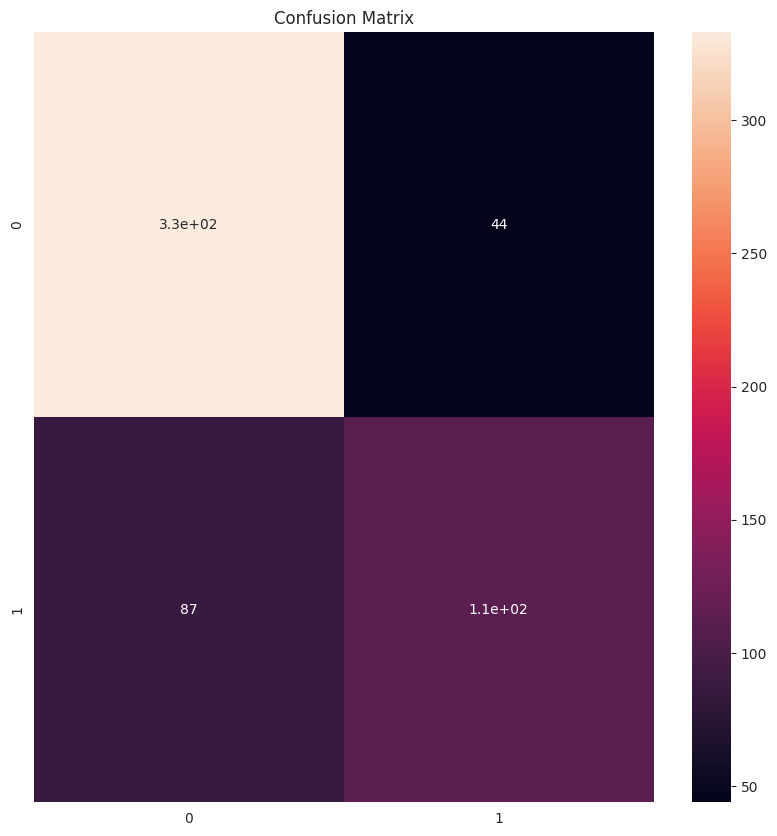

Precision Score Train: 0.717948717948718
Precision Score Test: 0.6285714285714286
Precision Score Validation 0.6363636363636364
recall Score Train: 0.5628140703517588
recal Score Test: 0.55
recall Score Validation 0.7241379310344828
f1 Score Train: 0.6309859154929578
f1 Score Test: 0.5866666666666667
f1 Score Validation 0.6774193548387097


In [65]:
svc = evaluate(clf3,clf3)

Model performance forSVC(kernel='linear')


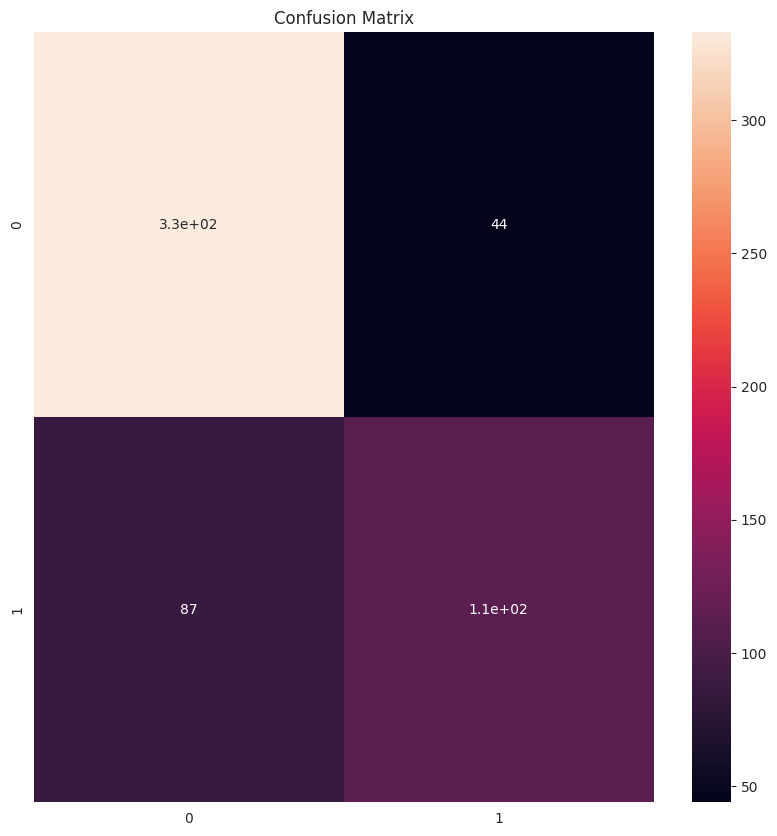

Precision Score Train: 0.717948717948718
Precision Score Test: 0.6285714285714286
Precision Score Validation 0.6363636363636364
recall Score Train: 0.5628140703517588
recal Score Test: 0.55
recall Score Validation 0.7241379310344828
f1 Score Train: 0.6309859154929578
f1 Score Test: 0.5866666666666667
f1 Score Validation 0.6774193548387097


In [66]:
svc = evaluate(clf3,clf3)

In [67]:
model_performance = [["Logistic Regression",LR[0],LR[1],LR[3],LR[4],LR[5],LR[6],LR[7],LR[8]],
                     ["Knearest Neighbors",KNN[0],KNN[1],KNN[3],KNN[4],KNN[5],KNN[6],KNN[7],KNN[8]],
                     ["Support Vector Machine",svc[0],svc[1],svc[3],svc[4],svc[5],svc[6],svc[7],svc[8]]]

In [68]:
model_performance = pd.DataFrame(model_performance,columns = ["Precision Score Train","Precision Score Test","Precision Score Validation","Recall Score Train","Recall Score Test","Recall Score Validation","F1 Score Train","F1 Score Test","F1 Score Validation"])

In [69]:
model_performance

,Precision Score Train,Precision Score Test,Precision Score Validation,Recall Score Train,Recall Score Test,Recall Score Validation,F1 Score Train,F1 Score Test,F1 Score Validation
0,Logistic Regression,0.717949,0.628571,0.562814,0.550,0.724138,0.630986,0.586667,0.677419
1,Knearest Neighbors,0.798942,0.500000,0.758794,0.475,0.655172,0.778351,0.487179,0.655172
2,Support Vector Machine,0.717949,0.628571,0.562814,0.550,0.724138,0.630986,0.586667,0.677419


#DATASET03 - 50_Startups
50_Startups This dataset has data collected from New York, California and Florida about 50 business Startups. The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

#1.Loading Required Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Lasso,LinearRegression,ElasticNet,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import xgboost
# import optuna

#2. Load Dataset

In [71]:
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_01/50_Startups%20-%2050_Startups.csv")

In [72]:
# Previewing data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Looking at the above dataset our target variable is the column "Profit"

#3.Looking for Null values

In [73]:
print(data.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


#4.Preprocessing

#1. Removing Unnecessary columns

In [74]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

As of now, we don't know which column is not much related

#2.Converting Categorical Variables into their corresponding form

In [75]:
print(data.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [76]:
#encoding Embarked column
le = LabelEncoder()
data['State'] = le.fit_transform(data["State"])

In [77]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


#3.Scaling Features

In the same way as encoding features we can also scale features manually. Scikit learn as inbuilt scalers that do the same task. Here we shall use standard scaler for our task

In [78]:
sc = StandardScaler()
data["R&D Spend"] = sc.fit_transform(data["R&D Spend"].values.reshape(-1,1))
data["Administration"] = sc.fit_transform(data["Administration"].values.reshape(-1,1))
data["Marketing Spend"] = sc.fit_transform(data["Marketing Spend"].values.reshape(-1,1))
# data["Profit"] = sc.fit_transform(data["Profit"].values.reshape(-1,1))

There's an important consideration when it comes to interpretation. If we scale the target variable during preprocessing (for example, using MinMaxScaler to scale it to a specific range), we'll need to remember that any predictions made by the model will be in the scaled range. If we need to interpret the predictions in the original units (e.g., dollars for profit), we'll have to reverse the scaling transformation to get the predictions in the original scale."

In [79]:
profit_data = data[["Profit"]]  # Extracting the "Profit" column as a separate DataFrame
scaler = StandardScaler()
scaled_profit = scaler.fit_transform(profit_data.values.reshape(-1,1))
# Converting the scaled profit back to a pandas Series (if needed)
# scaled_profit_series = pd.Series(scaled_profit[:, 0], name="Scaled_Profit")

In [80]:
# # Get the mean and standard deviation from the scaler
# mean_profit = scaler.mean_[0]
# std_dev_profit = scaler.scale_[0]

# scaled_prediction =  2.01120333

# # Reverse the scaling to get the prediction in the original units
# original_prediction = (scaled_prediction * std_dev_profit) + mean_profit

# print("Original prediction in dollars:", original_prediction)


In [81]:
# Droping profit column from dataset
data.drop(["Profit"],1,inplace = True)

In [82]:
data['scaled_profit'] = scaled_profit

In [83]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,scaled_profit
0,2.016411,0.560753,2.153943,2,2.011203
1,1.955860,1.082807,1.923600,0,1.999430
2,1.754364,-0.728257,1.626528,1,1.980842
3,1.554784,-0.096365,1.422210,2,1.776627
4,1.504937,-1.079919,1.281528,1,1.357740


#5.Basic EDA

#1.Gathering some info about data

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,-7.549517e-17,1.010153,-1.622362,-0.743498,-0.014756,0.613570,2.016411
Administration,50.0,-2.564615e-16,1.010153,-2.525994,-0.635046,0.048859,0.847179,2.210141
Marketing Spend,50.0,-1.554312e-16,1.010153,-1.743127,-0.675071,0.013969,0.730572,2.153943
State,50.0,1.000000e+00,0.832993,0.000000,0.000000,1.000000,2.000000,2.000000
scaled_profit,50.0,-5.151435e-16,1.010153,-2.439313,-0.548199,-0.101111,0.695554,2.011203


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   scaled_profit    50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


#2.Correlation plot

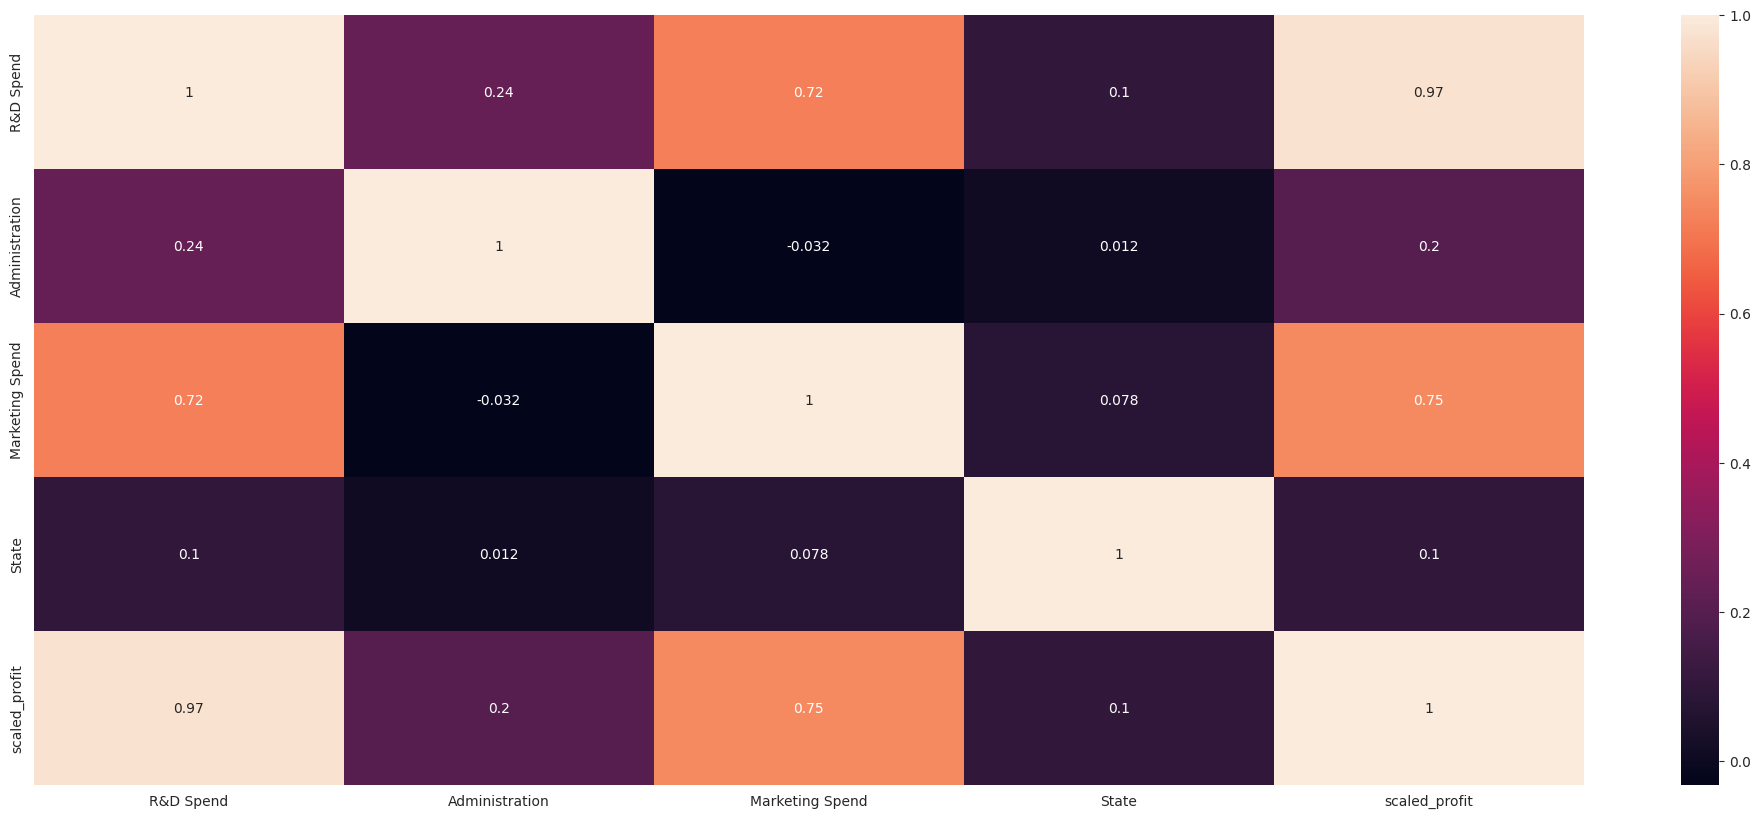

In [86]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True);

#We will not take state as a feature in our data preprocessing part

#3.Pairplot

<Figure size 2500x2500 with 0 Axes>

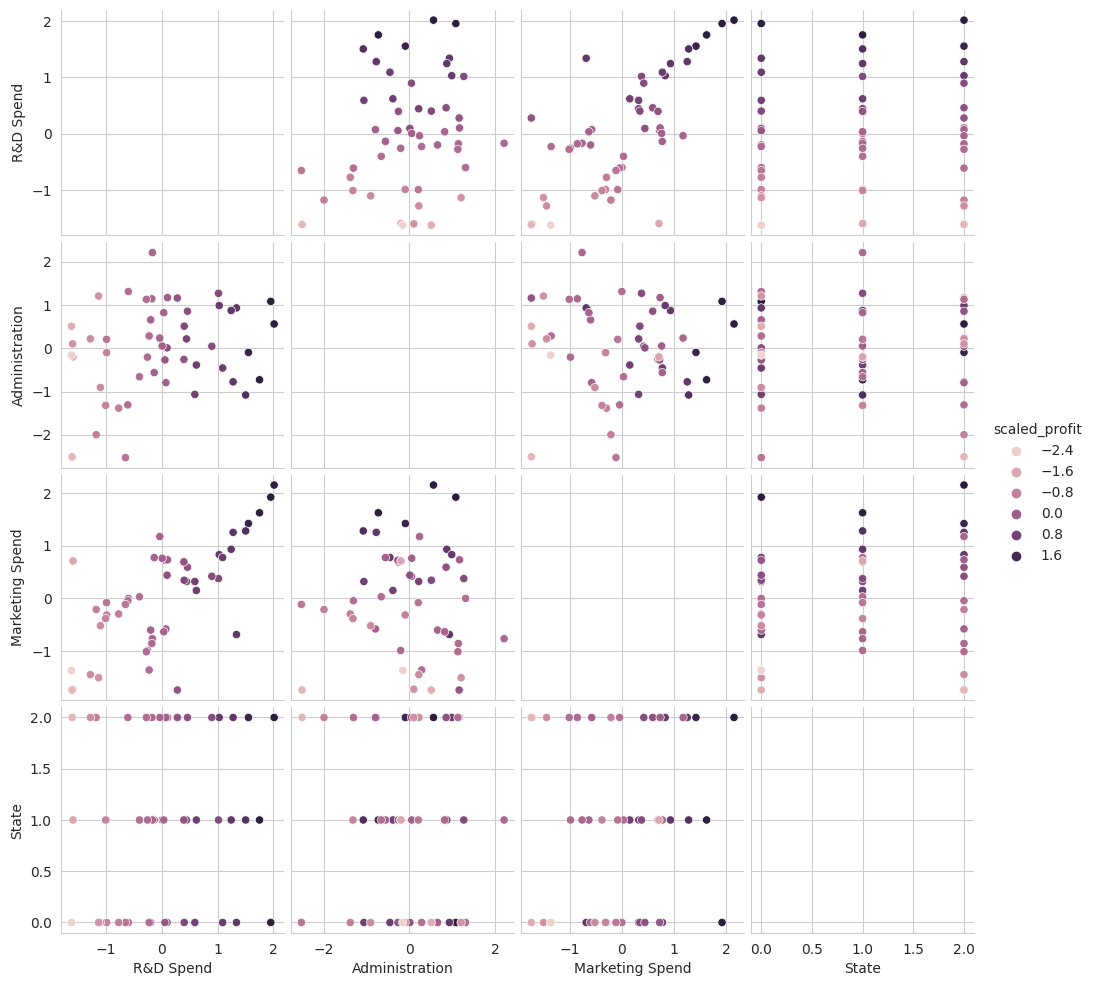

In [87]:
plt.figure(figsize = (25,25))
sb.pairplot(data,hue = "scaled_profit");

#4.You can plot using pandas too..

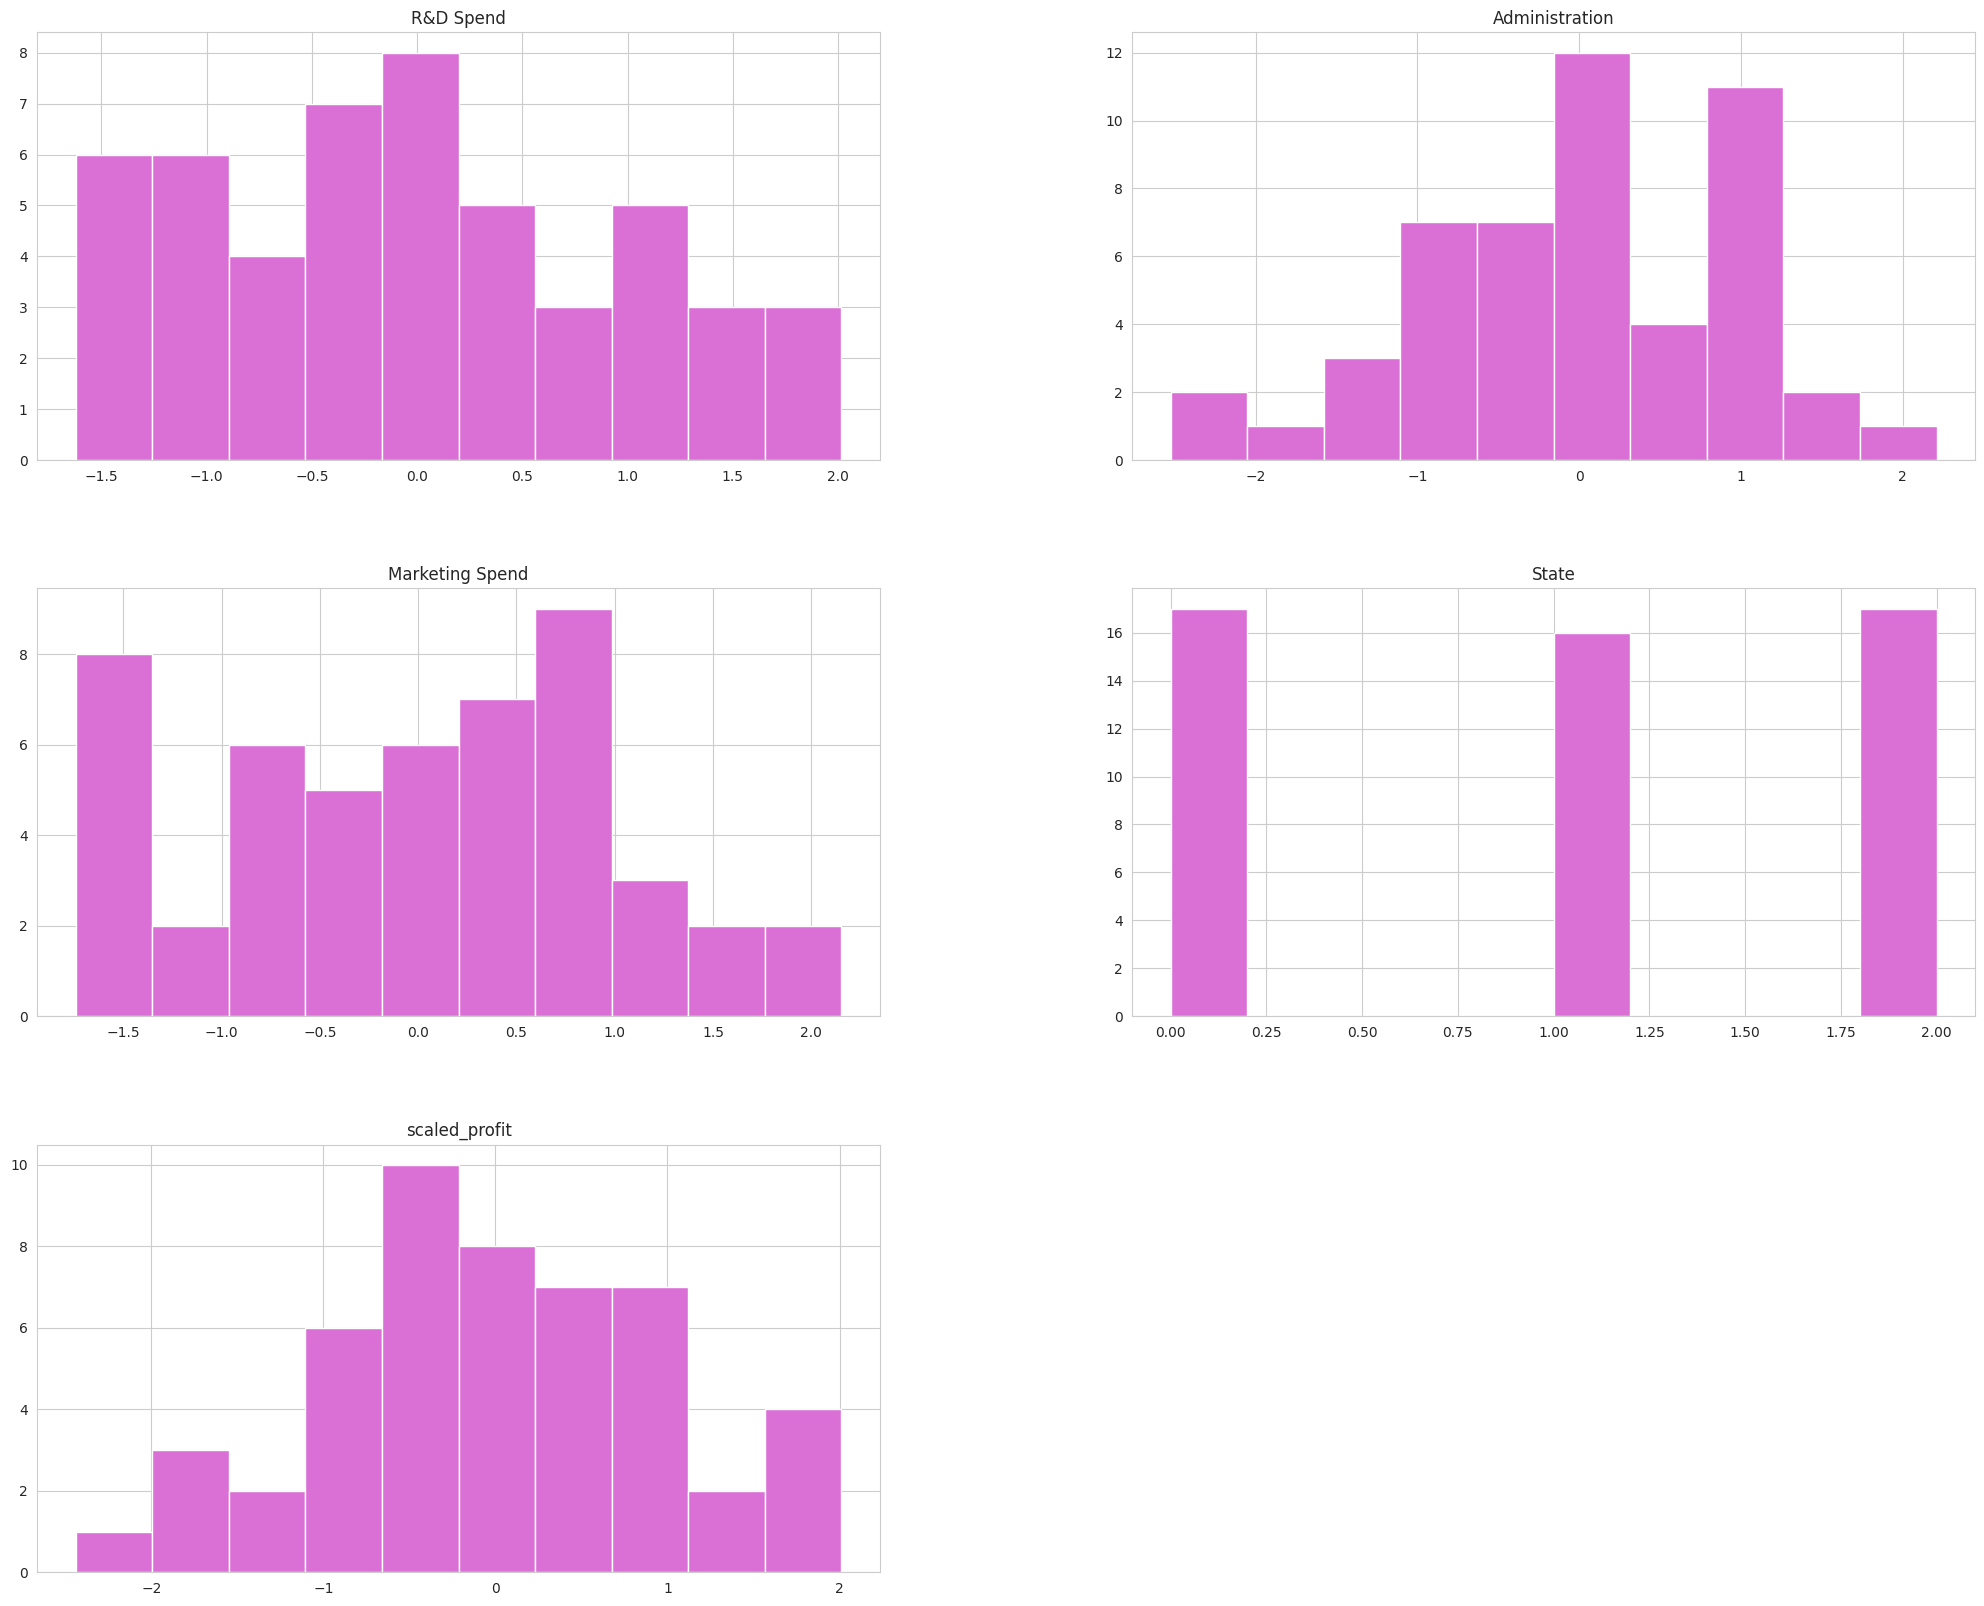

In [88]:
data.hist(figsize = (25,20),color = 'orchid');

#6.Splitting the dataset

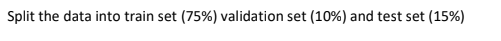

In [89]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,scaled_profit
0,2.016411,0.560753,2.153943,2,2.011203
1,1.955860,1.082807,1.923600,0,1.999430
2,1.754364,-0.728257,1.626528,1,1.980842
3,1.554784,-0.096365,1.422210,2,1.776627
4,1.504937,-1.079919,1.281528,1,1.357740


In [90]:
x = data.iloc[:,:3]
y = data['scaled_profit']

In [91]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [92]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.4,random_state = 42)

In [93]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(37, 3) (7, 3) (6, 3)
(37,) (7,) (6,)


#7.Model Selection

In [94]:
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid,y_valid = y_valid):

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_valid)

    Training_Score = np.round(model.score(x_train,y_train),3)
    Testing_Score = np.round(model.score(x_test,y_test),3)
    Validation_score = np.round(model.score(x_valid,y_valid))

    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    mse_validation = np.round(mean_squared_error(y_valid,y_val_pred),3)

    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    mae_valid = np.round(mean_absolute_error(y_valid,y_val_pred),3)

    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    r2_valid = np.round(r2_score(y_valid,y_val_pred),3)

    print("Model Performance for:",model_name)
    print("")

    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("Validation Score",Validation_score)
    print("")

    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("Validation Data Mean Squared Error:",mse_validation)

    print("")

    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("Validation Data Mean Absolute Error:",mae_valid)
    print("")

    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("Validation Data r2_score:",r2_valid)
    print("")

    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions')
    plt.scatter(y_valid,(y_valid-y_val_pred),color = 'blue',label = "Validation Predictions")
    plt.legend()
    plt.show()

    return Training_Score,Testing_Score,Validation_score,mse_training,mse_testing,mse_validation,mae_training,mae_testing,mae_valid,r2_training,r2_testing,r2_valid

#1. Linear Regression

In [95]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

Model Performance for: LinearRegression()

Training Score: 0.954
Testing Score: 0.849
Validation Score 1.0

Training Data Mean Squared Error: 0.05
Testing Data Mean Squared Error: 0.056
Validation Data Mean Squared Error: 0.053

Training Data Mean Absolute Error: 0.164
Testing Data Mean Absolute Error: 0.189
Validation Data Mean Absolute Error: 0.183

Training Data r2_score: 0.954
Testing Data r2_score: 0.849
Validation Data r2_score: 0.948

Residual Analysis:


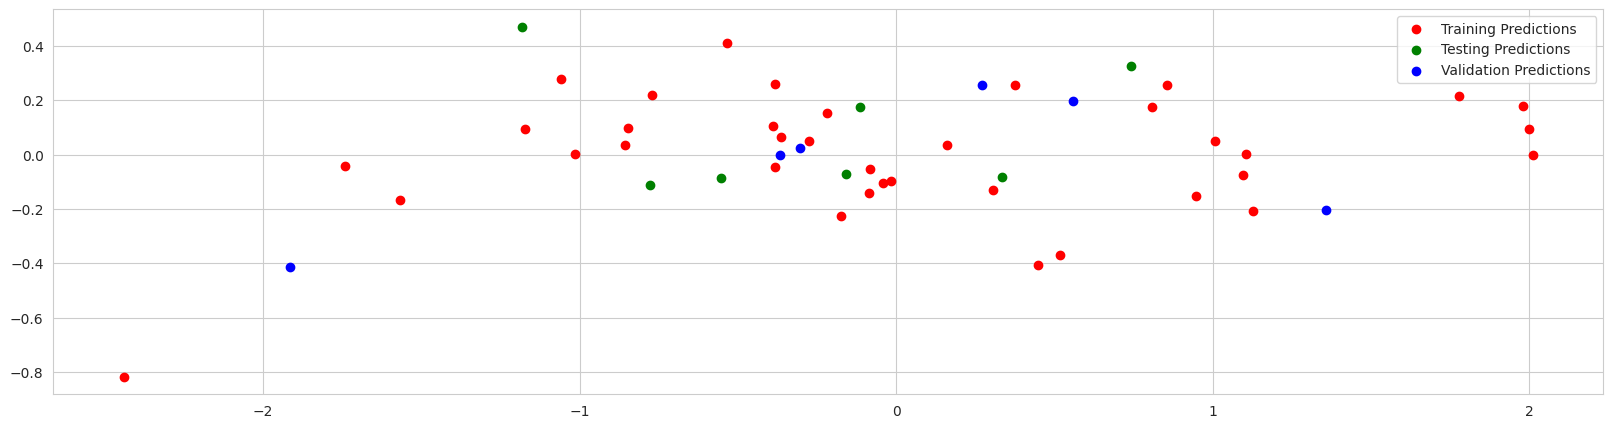

In [96]:
lr_perf = model_performance(model1,model_name = model1)

#2. Ridge

In [97]:
model2 = Ridge(alpha = 0.01)
model2.fit(x_train,y_train)

Ridge(alpha=0.01)

Model Performance for: Ridge(alpha=0.01)

Training Score: 0.954
Testing Score: 0.849
Validation Score 1.0

Training Data Mean Squared Error: 0.05
Testing Data Mean Squared Error: 0.056
Validation Data Mean Squared Error: 0.053

Training Data Mean Absolute Error: 0.164
Testing Data Mean Absolute Error: 0.189
Validation Data Mean Absolute Error: 0.183

Training Data r2_score: 0.954
Testing Data r2_score: 0.849
Validation Data r2_score: 0.948

Residual Analysis:


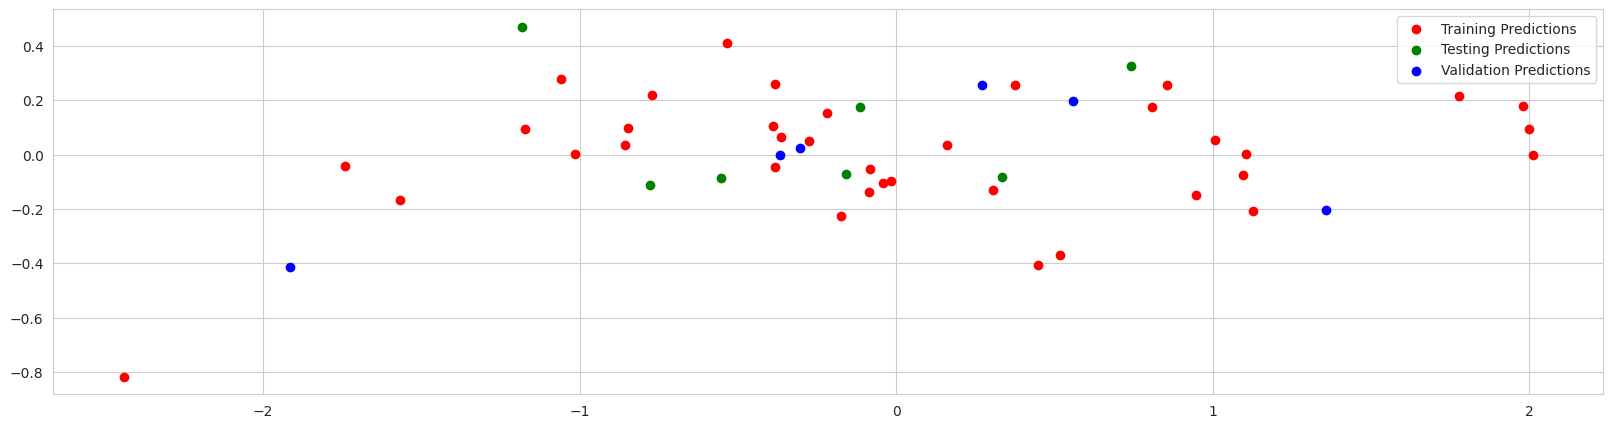

In [98]:
ridge_perf = model_performance(model2,model2)

#3. KNeighborsRegressor

In [99]:
model3 = KNeighborsRegressor(n_neighbors = 6)
model3.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

Model Performance for: KNeighborsRegressor(n_neighbors=6)

Training Score: 0.898
Testing Score: 0.862
Validation Score 1.0

Training Data Mean Squared Error: 0.112
Testing Data Mean Squared Error: 0.051
Validation Data Mean Squared Error: 0.269

Training Data Mean Absolute Error: 0.252
Testing Data Mean Absolute Error: 0.202
Validation Data Mean Absolute Error: 0.437

Training Data r2_score: 0.898
Testing Data r2_score: 0.862
Validation Data r2_score: 0.735

Residual Analysis:


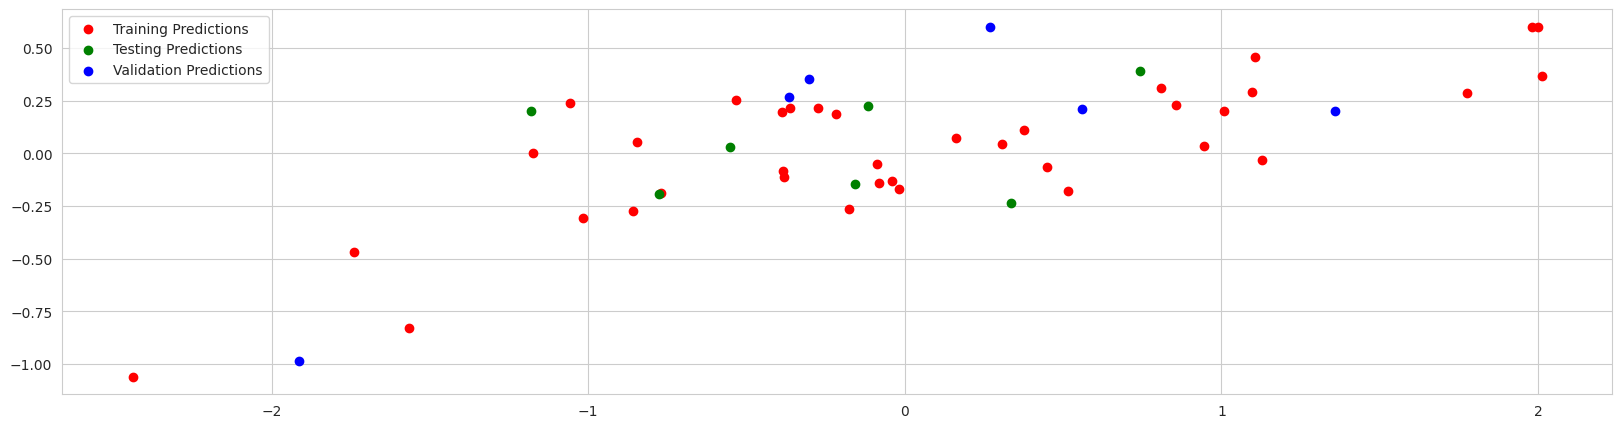

In [100]:
knn_perf = model_performance(model3,model3)

Linear Regression is giving best result

In [101]:
prediction = model1.predict(x_test)

In [102]:
prediction

array([-0.66439639, -0.46498393,  0.41686469, -0.28953794,  0.41544112,
       -1.65030452, -0.08646584])

In [103]:
# Get the mean and standard deviation from the scaler
mean_profit = scaler.mean_[0]
std_dev_profit = scaler.scale_[0]

scaled_prediction =  prediction

# Reverse the scaling to get the prediction in the original units
original_prediction = (scaled_prediction * std_dev_profit) + mean_profit

print("Original prediction in dollars:", original_prediction)

Original prediction in dollars: [ 85502.50398527  93459.27699416 128645.99157053 100459.7619706
 128589.18988353  46163.70173114 108562.55837568]
